In [3]:
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from sithom.plot import plot_defaults, label_subplots, lim

plot_defaults()

In [4]:
from tcpips.constants import DATA_PATH, FIGURE_PATH

In [5]:
DATA_PATH = "../data"

DATA_PATH

In [6]:
maxele63_f: str = os.path.join(DATA_PATH, "maxele.63.nc")

In [7]:
import datatree as dt

In [8]:
import netCDF4 as nc

In [9]:
ds_nc = nc.Dataset(maxele63_f)
ds_nc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    _FillValue: -99999.0
    model: ADCIRC
    version: 022ef7c
    grid_type: Triangular
    description: ADCIRC Example     ! 32 CHARACTER ALPHANUMERIC RUN DESCRIPTION
    agrid: eastcoast_95d_ll_select.grd
    rundes: ADCIRC Example     ! 32 CHARACTER ALPHANUMERIC RUN DESCRIPTION
    runid: Gustav (2008) on EC95d  ! 24 CHARACTER ALPANUMERIC RUN IDENTIFICATION
    title: NCFS
    institution: UNC-CH IMS, RENCI, SeahorseCoastal
    source: RENCI HPC
    history: NCFS Nowcast/Forecast
    references: http://www.renci.org
    comments: Model time is relative to UTC.
    host: RENCI HPC
    convention: CF
    Conventions: UGRID-0.9.0
    contact: jason.fleming@seahorsecoastal.com
    creation_date: 2024-01-27 22:15:40  00:00
    modification_date: 2024-01-27 22:15:40  00:00
    fort.15: ==== Input File Parameters (below) ====
    dt: 1.0
    ihot: 0
    ics: 2
    nolibf: 1
    nolifa: 2
    nol

In [10]:
# import xugrid as xu
# import uxarray as ux

In [11]:
ds_nc.dimensions

{'time': <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 1,
 'node': <class 'netCDF4._netCDF4.Dimension'>: name = 'node', size = 31435,
 'nele': <class 'netCDF4._netCDF4.Dimension'>: name = 'nele', size = 58369,
 'nvertex': <class 'netCDF4._netCDF4.Dimension'>: name = 'nvertex', size = 3,
 'nope': <class 'netCDF4._netCDF4.Dimension'>: name = 'nope', size = 1,
 'neta': <class 'netCDF4._netCDF4.Dimension'>: name = 'neta', size = 103,
 'max_nvdll': <class 'netCDF4._netCDF4.Dimension'>: name = 'max_nvdll', size = 103,
 'nbou': <class 'netCDF4._netCDF4.Dimension'>: name = 'nbou', size = 59,
 'nvel': <class 'netCDF4._netCDF4.Dimension'>: name = 'nvel', size = 4514,
 'max_nvell': <class 'netCDF4._netCDF4.Dimension'>: name = 'max_nvell', size = 3050,
 'mesh': <class 'netCDF4._netCDF4.Dimension'>: name = 'mesh', size = 1}

In [12]:
for var in ["neta", "nvel"]:
    if var in ds_nc.variables:
        del ds_nc.variables[var]

In [13]:
dataset = xr.open_dataset(xr.backends.NetCDF4DataStore(ds_nc))

/work/n01/n01/sithom/miniconda3/lib/python3.10/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [14]:
dataset

<xarray.Dataset>
Dimensions:           (time: 1, node: 31435, nele: 58369, nvertex: 3, mesh: 1,
                       nope: 1, neta: 103, nbou: 59, nvel: 4514)
Coordinates:
  * time              (time) datetime64[ns] 2014-05-06
    x                 (node) float64 ...
    y                 (node) float64 ...
Dimensions without coordinates: node, nele, nvertex, mesh, nope, neta, nbou,
                                nvel
Data variables: (12/13)
    element           (nele, nvertex) int32 ...
    adcirc_mesh       (mesh) int32 ...
    nvdll             (nope) int32 ...
    max_nvdll         int32 ...
    ibtypee           (nope) int32 ...
    nbdv              (neta) int32 ...
    ...                ...
    max_nvell         int32 ...
    ibtype            (nbou) int32 ...
    nbvv              (nvel) int32 ...
    depth             (node) float64 ...
    zeta_max          (node) float64 ...
    time_of_zeta_max  (node) float64 ...
Attributes: (12/49)
    _FillValue:         -99999.0
    model:              ADCIRC
    version:            022ef7c
    grid_type:          Triangular
    description:        ADCIRC Example     ! 32 CHARACTER ALPHANUMERIC RUN DE...
    agrid:              eastcoast_95d_ll_select.grd
    ...                 ...
    sfea0:              29.000000000000004
    cf:                 0.0
    eslm:               50.0
    cori:               0.0
    ntif:               8
    nbfr:               8

In [15]:
def xr_loader(file_name):
    ds_nc = nc.Dataset(file_name)
    for var in ["neta", "nvel"]:
        if var in ds_nc.variables:
            print("removing", ds_nc.variables[var])
            del ds_nc.variables[var]
    return xr.open_dataset(xr.backends.NetCDF4DataStore(ds_nc))

In [16]:
maxele_ds = xr_loader(maxele63_f)
maxele_ds

removing <class 'netCDF4._netCDF4.Variable'>
int32 neta()
    long_name: total number of elevation specified boundary nodes
    units: nondimensional
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used
removing <class 'netCDF4._netCDF4.Variable'>
int32 nvel()
    long_name: total number of normal flow specified boundary nodes including both the front and back nodes on internal barrier boundaries
    units: nondimensional
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used


<xarray.Dataset>
Dimensions:           (time: 1, node: 31435, nele: 58369, nvertex: 3, mesh: 1,
                       nope: 1, neta: 103, nbou: 59, nvel: 4514)
Coordinates:
  * time              (time) datetime64[ns] 2014-05-06
    x                 (node) float64 ...
    y                 (node) float64 ...
Dimensions without coordinates: node, nele, nvertex, mesh, nope, neta, nbou,
                                nvel
Data variables: (12/13)
    element           (nele, nvertex) int32 ...
    adcirc_mesh       (mesh) int32 ...
    nvdll             (nope) int32 ...
    max_nvdll         int32 ...
    ibtypee           (nope) int32 ...
    nbdv              (neta) int32 ...
    ...                ...
    max_nvell         int32 ...
    ibtype            (nbou) int32 ...
    nbvv              (nvel) int32 ...
    depth             (node) float64 ...
    zeta_max          (node) float64 ...
    time_of_zeta_max  (node) float64 ...
Attributes: (12/49)
    _FillValue:         -99999.0
    model:              ADCIRC
    version:            022ef7c
    grid_type:          Triangular
    description:        ADCIRC Example     ! 32 CHARACTER ALPHANUMERIC RUN DE...
    agrid:              eastcoast_95d_ll_select.grd
    ...                 ...
    sfea0:              29.000000000000004
    cf:                 0.0
    eslm:               50.0
    cori:               0.0
    ntif:               8
    nbfr:               8

In [17]:
f63_ds = xr_loader(os.path.join(DATA_PATH, "fort.63.nc"))

removing <class 'netCDF4._netCDF4.Variable'>
int32 neta()
    long_name: total number of elevation specified boundary nodes
    units: nondimensional
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used
removing <class 'netCDF4._netCDF4.Variable'>
int32 nvel()
    long_name: total number of normal flow specified boundary nodes including both the front and back nodes on internal barrier boundaries
    units: nondimensional
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used


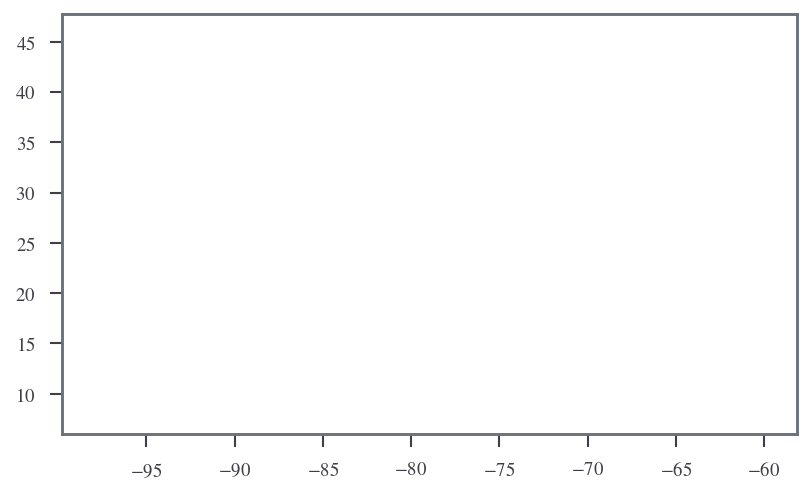

In [18]:
plt.tripcolor(
    maxele_ds.x.values,
    maxele_ds.y.values,
    maxele_ds.zeta_max.values,
    triangles=maxele_ds.element.values - 1,
)

Text(0.5, 0, 'Depth')

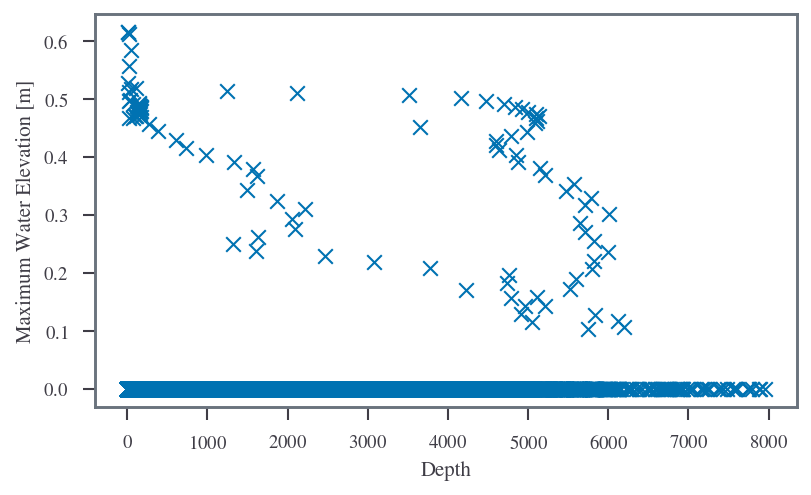

In [19]:
plt.scatter(maxele_ds.depth.values, maxele_ds.zeta_max.values, marker="x")
plt.ylabel("Maximum Water Elevation [m]")
plt.xlabel("Depth")

In [20]:
import pandas


def plot_levels(ds) -> False:
    vmin, vmax = lim(ds.zeta.values, percentile=0, balance=True)
    vmin, vmax = np.min([-vmax, vmin]), np.max([-vmin, vmax])
    levels = np.linspace(vmin, vmax, num=400)
    cbar_levels = np.linspace(vmin, vmax, num=7)

    plt.tricontourf(
        ds.lon.values,
        ds.lat.values,
        ds.element.values - 1,
        np.nan_to_num(ds.zeta.values),
        vmin=vmin,
        vmax=vmax,
        levels=levels,
        cmap="cmo.balance",
    )
    cbar = plt.colorbar(label="Height [m]")
    cbar.set_ticks(cbar_levels)
    cbar.set_ticklabels(["{:.2f}".format(x) for x in cbar_levels.tolist()])

    plt.xlabel("Longitude [$^{\circ}$E]")
    plt.ylabel("Latitude [$^{\circ}$N]")
    if False:
        time = ds.isel(time=num).time.values
        ts = pd.to_datetime(str(time))
        lt.title(ts.strftime("%Y-%m-%d  %H:%M"))

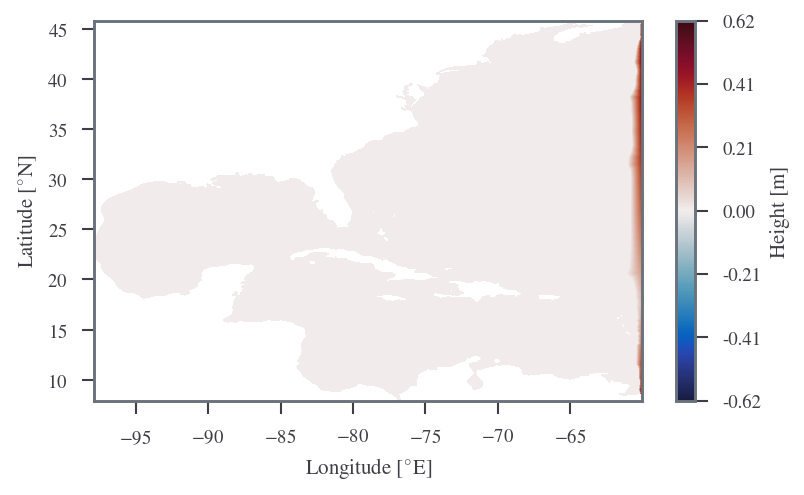

In [21]:
plot_levels(maxele_ds.rename_vars({"zeta_max": "zeta", "x": "lon", "y": "lat"}))

In [22]:
mds = maxele_ds.rename_vars({"zeta_max": "zeta", "x": "lon", "y": "lat"})

In [23]:
mds.zeta.values.shape, mds.lon.values.shape, mds.lat.values.shape, mds.adcirc_mesh.values.shape,

((31435,), (31435,), (31435,), (1,))

In [24]:
mds

<xarray.Dataset>
Dimensions:           (time: 1, node: 31435, nele: 58369, nvertex: 3, mesh: 1,
                       nope: 1, neta: 103, nbou: 59, nvel: 4514)
Coordinates:
  * time              (time) datetime64[ns] 2014-05-06
    lon               (node) float64 -94.43 -94.27 -94.38 ... -63.54 -63.47
    lat               (node) float64 18.14 18.17 18.23 ... 45.33 45.37 45.37
Dimensions without coordinates: node, nele, nvertex, mesh, nope, neta, nbou,
                                nvel
Data variables: (12/13)
    element           (nele, nvertex) int32 18760 18493 18761 ... 18754 18755
    adcirc_mesh       (mesh) int32 -2147483647
    nvdll             (nope) int32 ...
    max_nvdll         int32 ...
    ibtypee           (nope) int32 ...
    nbdv              (neta) int32 ...
    ...                ...
    max_nvell         int32 ...
    ibtype            (nbou) int32 ...
    nbvv              (nvel) int32 ...
    depth             (node) float64 9.847 10.39 14.89 16.19 ... 10.0 10.0 10.0
    zeta              (node) float64 1.694e-12 1.687e-12 ... 2.108e-21
    time_of_zeta_max  (node) float64 ...
Attributes: (12/49)
    _FillValue:         -99999.0
    model:              ADCIRC
    version:            022ef7c
    grid_type:          Triangular
    description:        ADCIRC Example     ! 32 CHARACTER ALPHANUMERIC RUN DE...
    agrid:              eastcoast_95d_ll_select.grd
    ...                 ...
    sfea0:              29.000000000000004
    cf:                 0.0
    eslm:               50.0
    cori:               0.0
    ntif:               8
    nbfr:               8

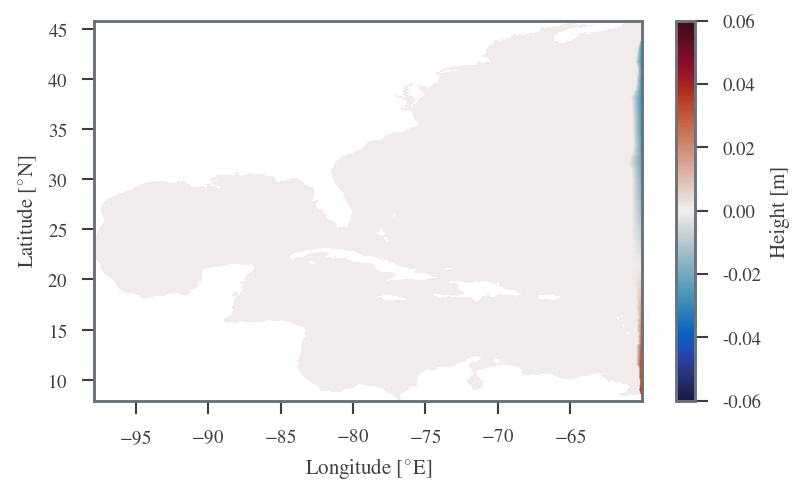

In [25]:
plot_levels(f63_ds.rename_vars({"x": "lon", "y": "lat"}).isel(time=10))

In [26]:
def plot_from_path(file_path: str) -> None:
    maxele_dss = xr_loader(os.path.join(file_path, "maxele.63.nc"))
    mdss = maxele_dss.rename_vars({"zeta_max": "zeta", "x": "lon", "y": "lat"})
    plot_levels(mdss)

removing <class 'netCDF4._netCDF4.Variable'>
int32 neta()
    long_name: total number of elevation specified boundary nodes
    units: nondimensional
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used
removing <class 'netCDF4._netCDF4.Variable'>
int32 nvel()
    long_name: total number of normal flow specified boundary nodes including both the front and back nodes on internal barrier boundaries
    units: nondimensional
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used


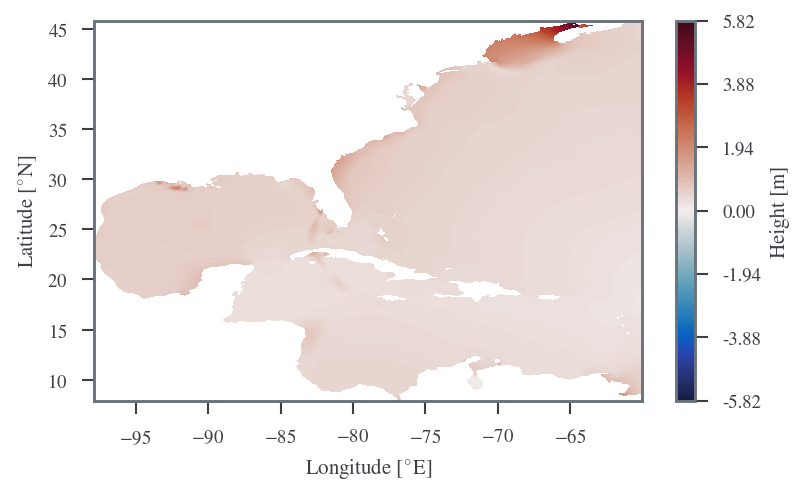

In [27]:
plot_from_path("../../NWS13example")

removing <class 'netCDF4._netCDF4.Variable'>
int32 neta()
    long_name: total number of elevation specified boundary nodes
    units: nondimensional
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used
removing <class 'netCDF4._netCDF4.Variable'>
int32 nvel()
    long_name: total number of normal flow specified boundary nodes including both the front and back nodes on internal barrier boundaries
    units: nondimensional
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used


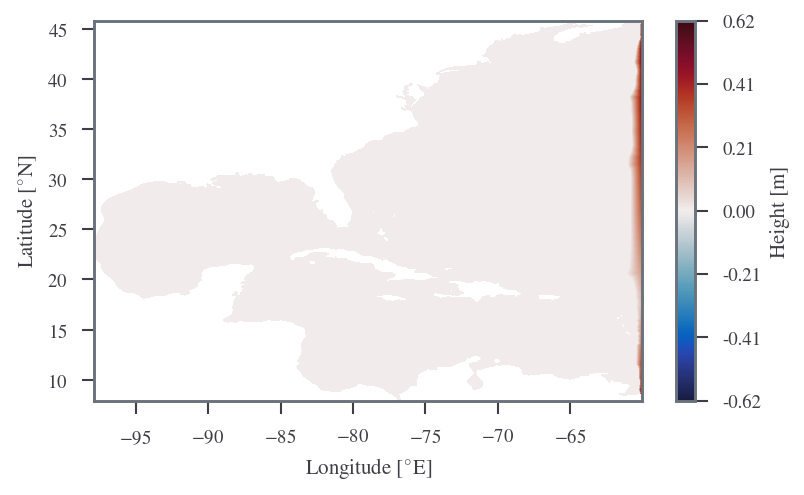

In [28]:
plot_from_path("../../NWS13ex")

removing <class 'netCDF4._netCDF4.Variable'>
int32 neta()
    long_name: total number of elevation specified boundary nodes
    units: nondimensional
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used
removing <class 'netCDF4._netCDF4.Variable'>
int32 nvel()
    long_name: total number of normal flow specified boundary nodes including both the front and back nodes on internal barrier boundaries
    units: nondimensional
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used


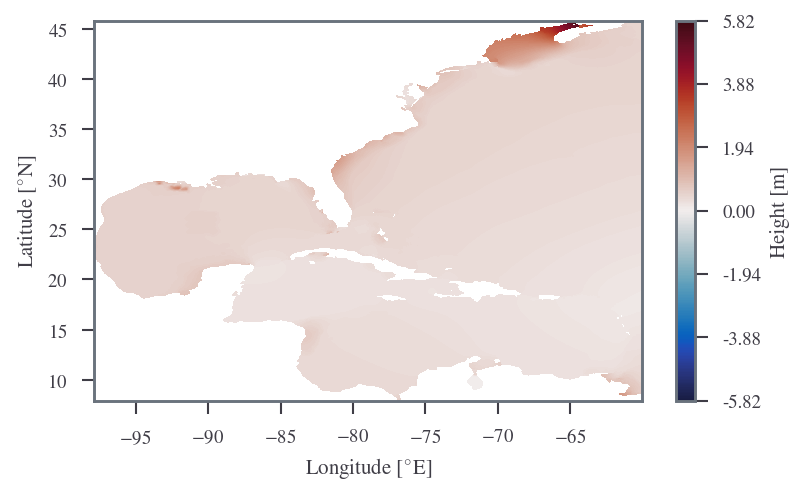

In [29]:
plot_from_path("../../NWS13blank")

removing <class 'netCDF4._netCDF4.Variable'>
int32 neta()
    long_name: total number of elevation specified boundary nodes
    units: nondimensional
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used
removing <class 'netCDF4._netCDF4.Variable'>
int32 nvel()
    long_name: total number of normal flow specified boundary nodes including both the front and back nodes on internal barrier boundaries
    units: nondimensional
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used


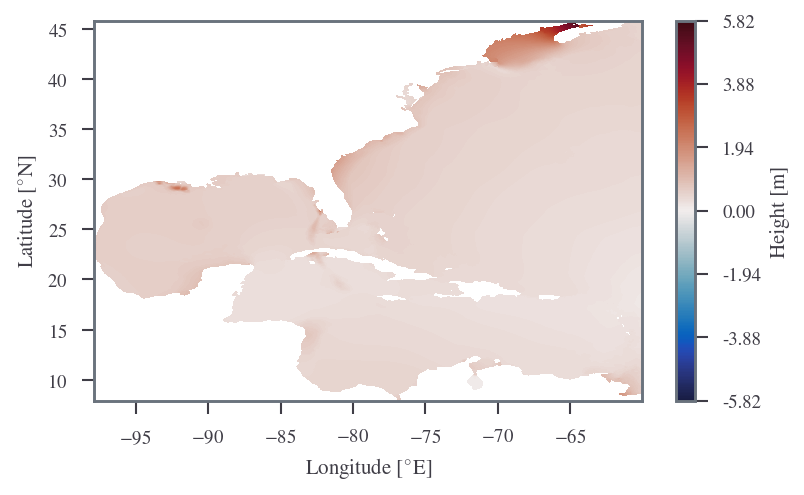

In [30]:
plot_from_path("../../nws13.control")

removing <class 'netCDF4._netCDF4.Variable'>
int32 neta()
    long_name: total number of elevation specified boundary nodes
    units: nondimensional
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used
removing <class 'netCDF4._netCDF4.Variable'>
int32 nvel()
    long_name: total number of normal flow specified boundary nodes including both the front and back nodes on internal barrier boundaries
    units: nondimensional
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used


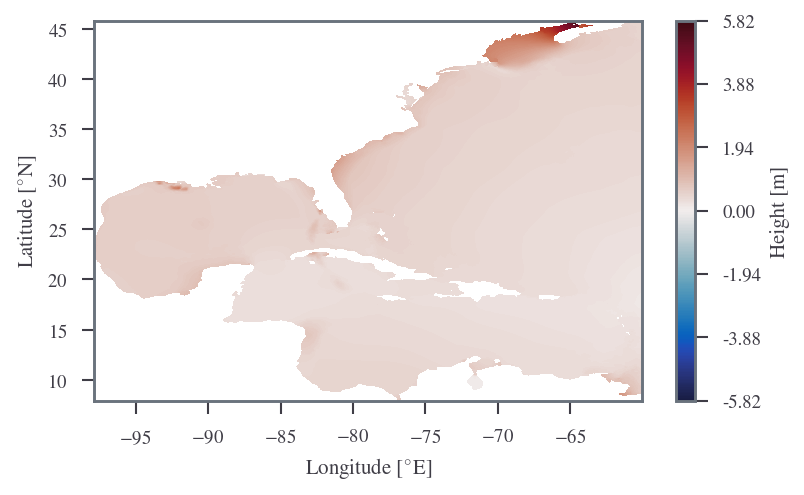

In [31]:
plot_from_path("../../NWS13single")

removing <class 'netCDF4._netCDF4.Variable'>
int32 neta()
    long_name: total number of elevation specified boundary nodes
    units: nondimensional
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used
removing <class 'netCDF4._netCDF4.Variable'>
int32 nvel()
    long_name: total number of normal flow specified boundary nodes including both the front and back nodes on internal barrier boundaries
    units: nondimensional
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used


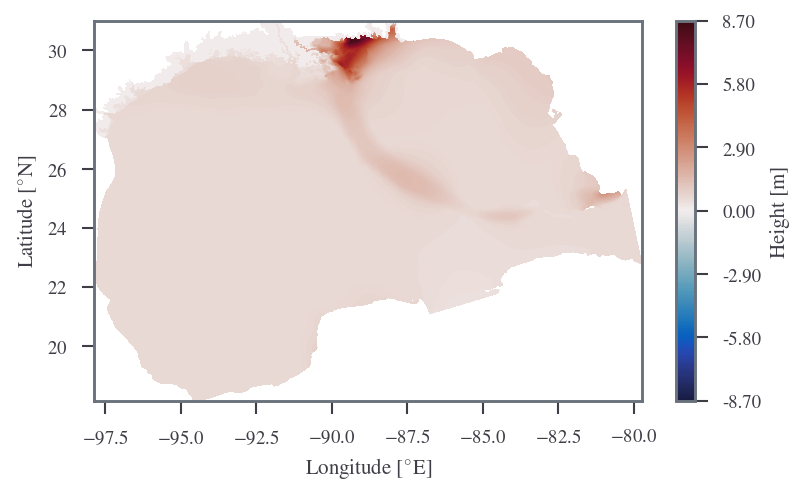

In [33]:
plot_from_path("../../kat2")

removing <class 'netCDF4._netCDF4.Variable'>
int32 neta()
    long_name: total number of elevation specified boundary nodes
    units: nondimensional
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used
removing <class 'netCDF4._netCDF4.Variable'>
int32 nvel()
    long_name: total number of normal flow specified boundary nodes including both the front and back nodes on internal barrier boundaries
    units: nondimensional
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used


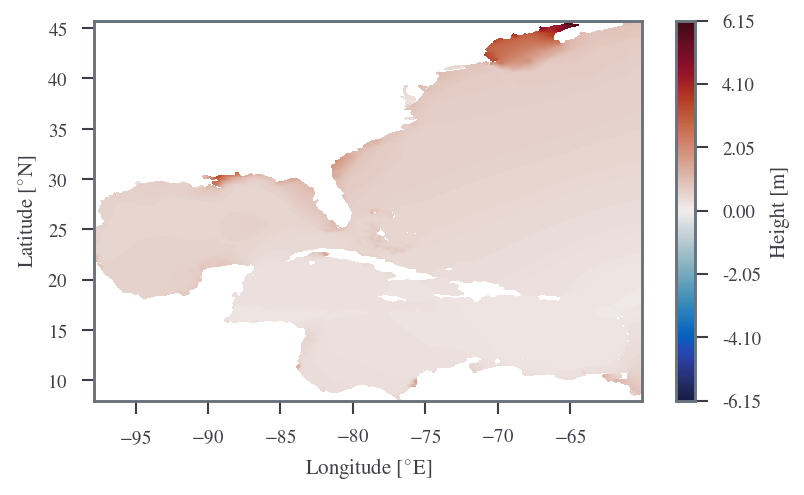

In [34]:
plot_from_path("../../testsuite/adcirc/adcirc_katrina-2d-parallel/")

removing <class 'netCDF4._netCDF4.Variable'>
int32 neta()
    long_name: total number of elevation specified boundary nodes
    units: nondimensional
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used
removing <class 'netCDF4._netCDF4.Variable'>
int32 nvel()
    long_name: total number of normal flow specified boundary nodes including both the front and back nodes on internal barrier boundaries
    units: nondimensional
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used


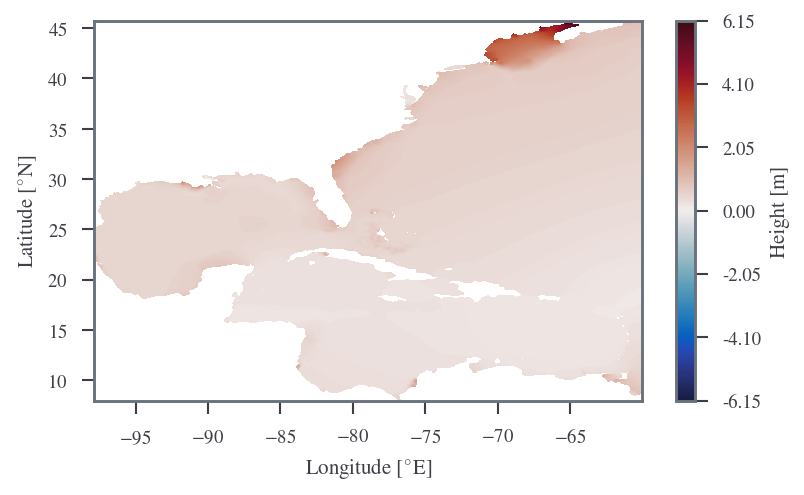

In [35]:
plot_from_path("../../testsuite/adcirc/adcirc_katrina-2d-nws13-parallel/")

removing <class 'netCDF4._netCDF4.Variable'>
int32 neta()
    long_name: total number of elevation specified boundary nodes
    units: nondimensional
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used
removing <class 'netCDF4._netCDF4.Variable'>
int32 nvel()
    long_name: total number of normal flow specified boundary nodes including both the front and back nodes on internal barrier boundaries
    units: nondimensional
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used


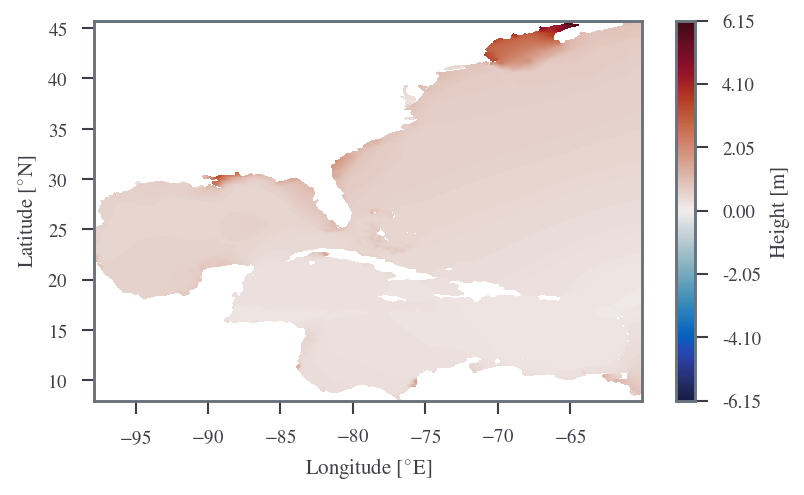

In [38]:
plot_from_path("../../testsuite/adcirc/adcirc_katria_2d-highres/")

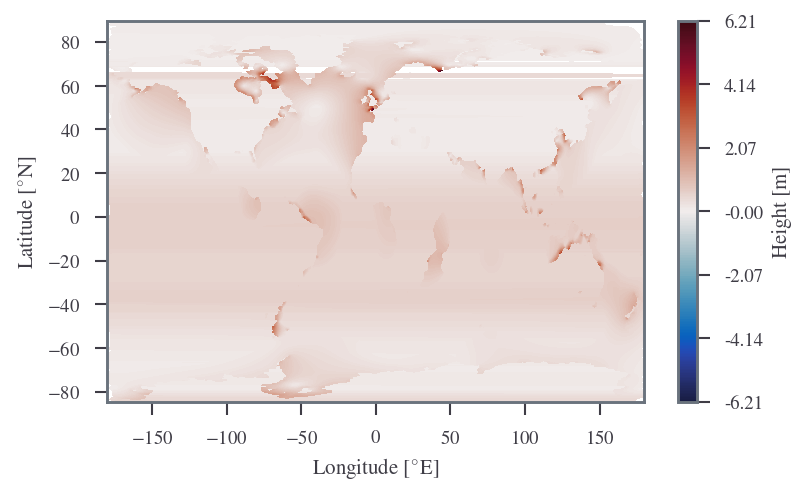

In [40]:
plot_from_path("../../testsuite/adcirc/adcirc_global-tide-2d/")

removing <class 'netCDF4._netCDF4.Variable'>
int32 neta()
    long_name: total number of elevation specified boundary nodes
    units: nondimensional
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used
removing <class 'netCDF4._netCDF4.Variable'>
int32 nvel()
    long_name: total number of normal flow specified boundary nodes including both the front and back nodes on internal barrier boundaries
    units: nondimensional
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used


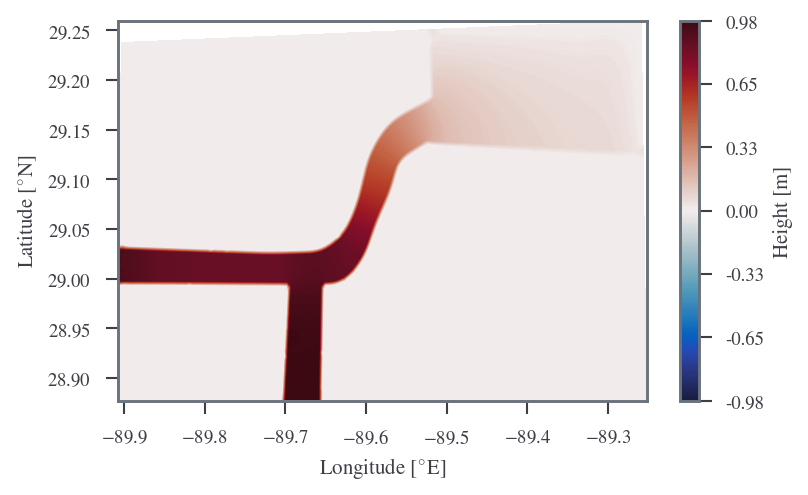

In [41]:
plot_from_path("../../testsuite/adcirc/adcirc_rivers")

removing <class 'netCDF4._netCDF4.Variable'>
int32 neta()
    long_name: total number of elevation specified boundary nodes
    units: nondimensional
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used
removing <class 'netCDF4._netCDF4.Variable'>
int32 nvel()
    long_name: total number of normal flow specified boundary nodes including both the front and back nodes on internal barrier boundaries
    units: nondimensional
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used


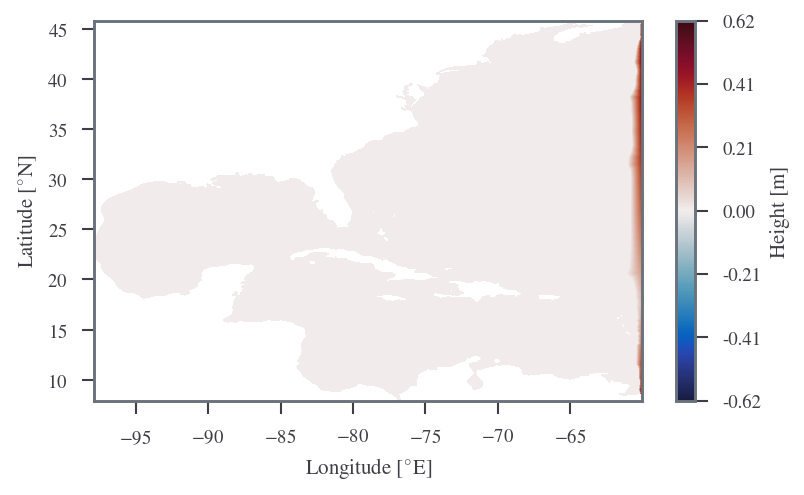

In [43]:
plot_from_path("../../NWS13ex")